WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Loading historical data from cache...
Loading historical data from cache...
Loading historical data from cache...
mu_mean: 0.7371, mu_std: 0.3673
sigma_mean: 0.3673, sigma_std: 0.0688


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


Start Price: 63.69


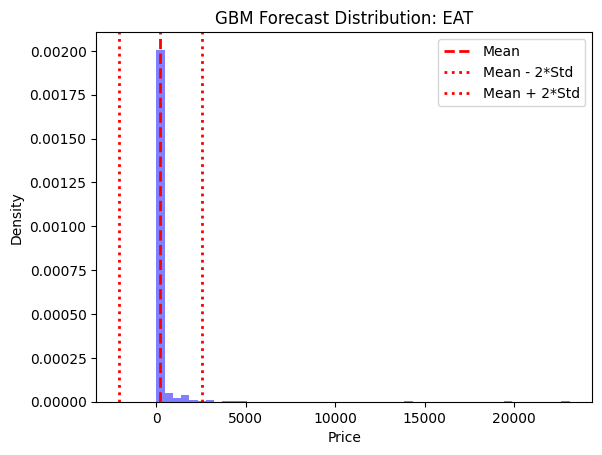

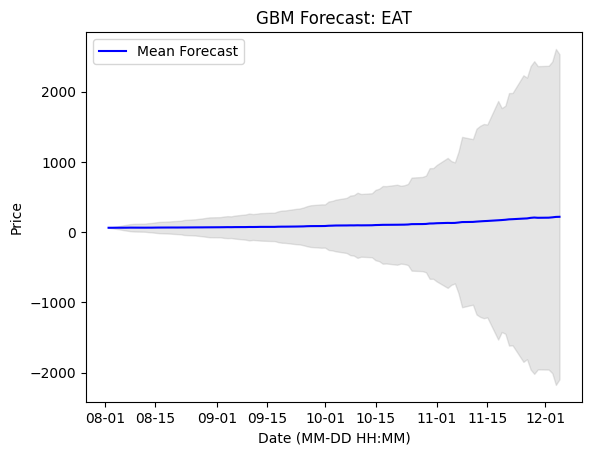


95% Confidence Interval:
Lower Bound: -2093.78
Upper Bound: 2533.66

Coverage Probability: 0.98
Number of Simulations Above Upper Bound: 16
Number of Simulations Below Lower Bound: 0


<Figure size 640x480 with 0 Axes>

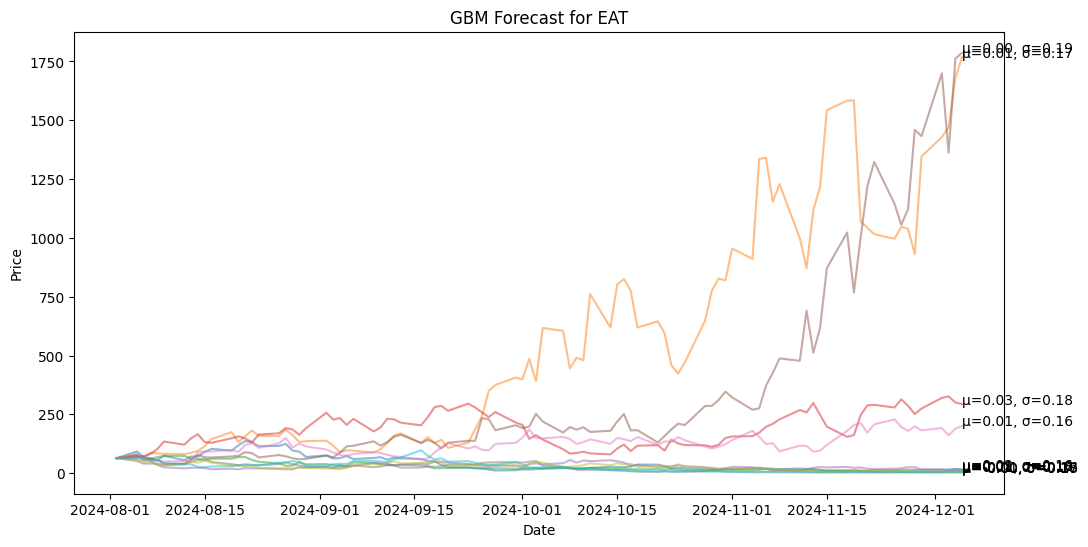

Simulation 1 MSE: 5022.205529876365
Simulation 2 MSE: 435748.38469857624
Simulation 3 MSE: 5522.61499592639
Simulation 4 MSE: 13418.058679617781
Simulation 5 MSE: 4605.183640553525
Simulation 6 MSE: 252301.45150924826
Simulation 7 MSE: 1981.0487006269234
Simulation 8 MSE: 5907.70193624403
Simulation 9 MSE: 5138.752052583729
Simulation 10 MSE: 5928.506681841489
Simulation 11 MSE: 5331.690818111467
Simulation 12 MSE: 3935.555607009296
Simulation 13 MSE: 6721.486098954748
Simulation 14 MSE: 2594.4623181887355
Simulation 15 MSE: 13809.008727983139
Simulation 16 MSE: 4830.663226889681
Simulation 17 MSE: 2393.090080867126
Simulation 18 MSE: 34828.47395900453
Simulation 19 MSE: 1625.9725023797089
Simulation 20 MSE: 7065.316177445243
Simulation 21 MSE: 4699.849407381995
Simulation 22 MSE: 5903.8196202123745
Simulation 23 MSE: 296873.2212539365
Simulation 24 MSE: 3650.0491328457597
Simulation 25 MSE: 5549.701909247729
Simulation 26 MSE: 3405.6584218590547
Simulation 27 MSE: 4846.111507734726
Si

In [ ]:




from backtester import Backtester
import matplotlib.pyplot as plt
# ignore warnings
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

stock = 'EAT'
time_periods = 90
gbm_params = {
    'threshold': 2,
    'time_periods': time_periods,
    'num_simulations': 10000,
}
backtester = Backtester(stock, 'SMART', 'USD')
# data will be the most recent year of data, excluding the last 90 days. this is 
# because we will use the last 90 days as the test data
df = backtester.one_yr_1d_data
# is df a pandas dataframe?


# train data is the data excluding the last 90 days
train_data = df[df.index < df.index[-time_periods]]
test_data = df['close'][df.index >= df.index[-time_periods]]



simulations, associated_mu, associated_sigma, forecast_dates = backtester.forecast_data(gbm_params,train_data)
# we will use the last 90 days of data to test the model

mses = []
for i in range(gbm_params['num_simulations']):
    simulation = simulations[i]
    mse = sum((test_data - simulation) ** 2) / len(test_data)
    mses.append(mse)
    print(f'Simulation {i+1} MSE: {mse}')








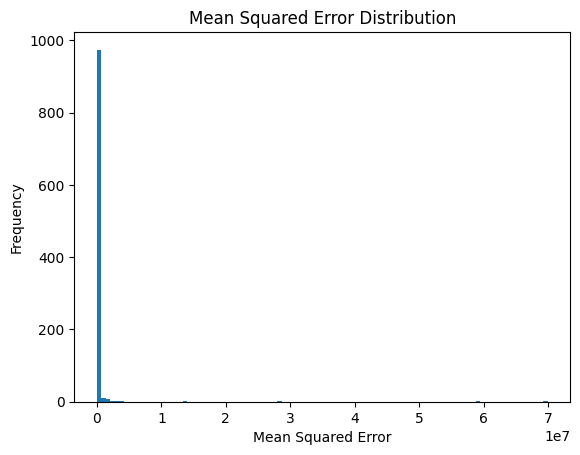

Simulation 1 MSE: 649.3137296343119
Associated mu: 0.001539346808332285
Associated sigma: 0.16308844392717428
Simulation 2 MSE: 665.6631179461256
Associated mu: 0.03895325962079446
Associated sigma: 0.14991297407042298
Simulation 3 MSE: 743.6372305934772
Associated mu: 0.003958577746310347
Associated sigma: 0.18173026659684433
Simulation 4 MSE: 773.4545019298388
Associated mu: -0.004049810990475451
Associated sigma: 0.16502947807927765
Simulation 5 MSE: 806.411845265808
Associated mu: 0.008062858960526565
Associated sigma: 0.159718783848156
Simulation 6 MSE: 815.7817718331905
Associated mu: 0.0058303674090306665
Associated sigma: 0.17260913137688322
Simulation 7 MSE: 845.985172439378
Associated mu: -0.018640728252177618
Associated sigma: 0.18907241302784777
Simulation 8 MSE: 851.8367764894498
Associated mu: 0.03177748660876501
Associated sigma: 0.1553862136040786
Simulation 9 MSE: 871.0332396163623
Associated mu: 0.01583317364571196
Associated sigma: 0.16435962868028856
Simulation 10 M

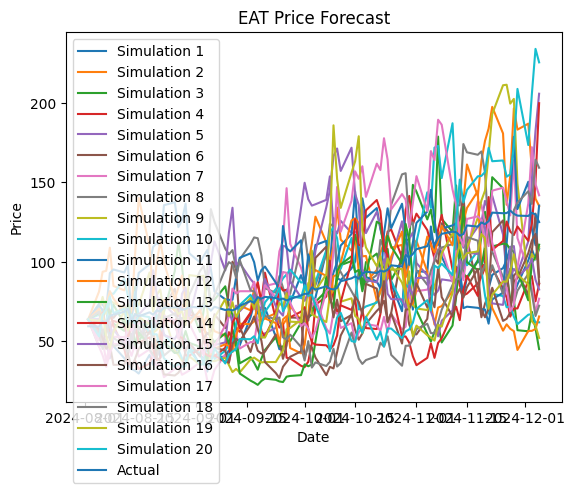

In [2]:
# study the distribution of the mean squared errors
# disgard inf
plt.hist(mses, bins=100)
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Mean Squared Error Distribution')
plt.show()

# i want to do analysis on say how confident the model is in its predictions
# show some of the simulations that have the lowest mean squared error

# mses is a list of mean squared errors for each simulation
# plot the simulations with the 5 lowest mean squared error
for i in range(20):
    plt.plot(forecast_dates, simulations[mses.index(min(mses))], label=f'Simulation {i+1}')
    print(f'Simulation {i+1} MSE: {min(mses)}')
    # print the associated mu and sigma
    print(f'Associated mu: {associated_mu[mses.index(min(mses))]}')
    print(f'Associated sigma: {associated_sigma[mses.index(min(mses))]}') 
    mses[mses.index(min(mses))] = float('inf')

plt.plot(forecast_dates, test_data, label='Actual')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock} Price Forecast')
plt.show()